<a href="https://colab.research.google.com/github/KhatijaBegum27/AI-ML-Projects/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [ ]:
X_train = X_train.astype("float32") / 255.0

In [ ]:
print("Training data shape:", X_train.shape)

Training data shape: (50000, 32, 32, 3)


In [ ]:
print("Testing data shape:", X_test.shape)

Testing data shape: (10000, 32, 32, 3)


In [ ]:
classes = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

/tmp/ipython-input-3073989667.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[i])])


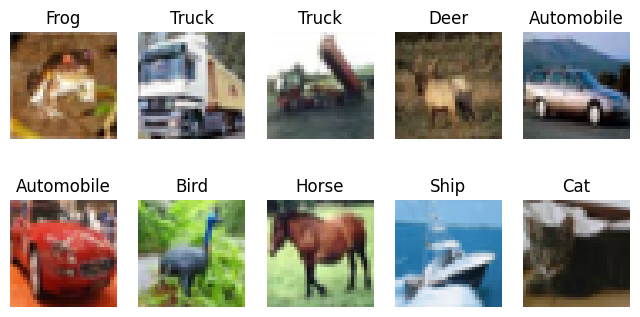

In [ ]:
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(classes[int(y_train[i])])
    plt.axis("off")
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=5, batch_size=128)

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 91s 250ms/step - accuracy: 0.3429 - loss: 1.8004 - val_accuracy: 0.5232 - val_loss: 1.3206
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 89s 254ms/step - accuracy: 0.5759 - loss: 1.1961 - val_accuracy: 0.6432 - val_loss: 1.0237
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 142s 255ms/step - accuracy: 0.6498 - loss: 0.9910 - val_accuracy: 0.6820 - val_loss: 0.9199
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 140s 249ms/step - accuracy: 0.7039 - loss: 0.8464 - val_accuracy: 0.7110 - val_loss: 0.8476
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 146s 261ms/step - accuracy: 0.7362 - loss: 0.7593 - val_accuracy: 0.7126 - val_loss: 0.8258


In [ ]:
# 5. Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5815 - loss: 163.2140
Test Accuracy: 0.5790


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


/tmp/ipython-input-3020332195.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"True: {classes[int(y_test[i])]}, Pred: {classes[np.argmax(predictions[i])]}")


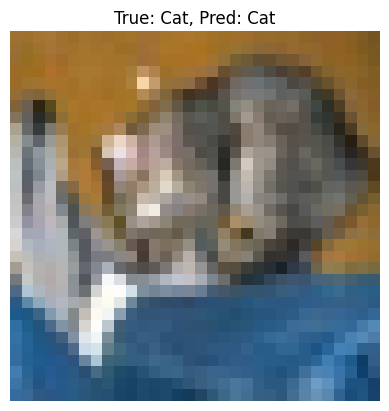

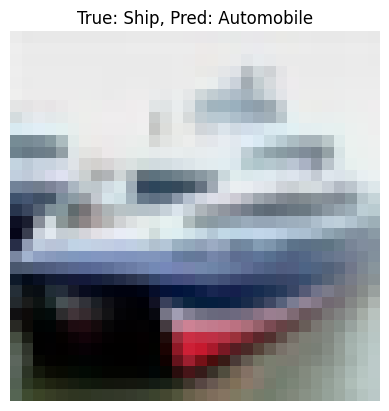

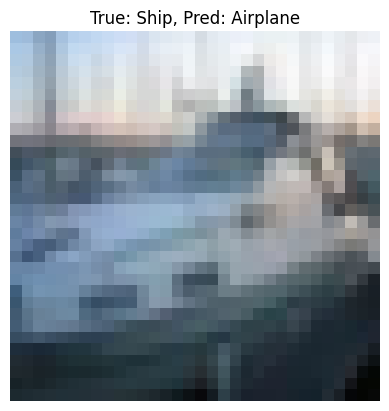

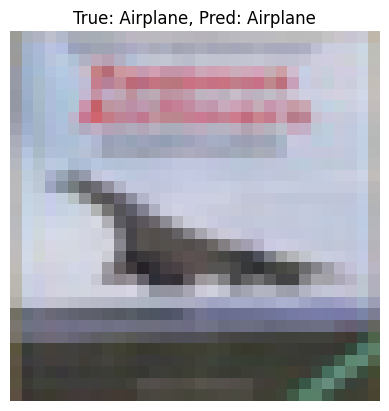

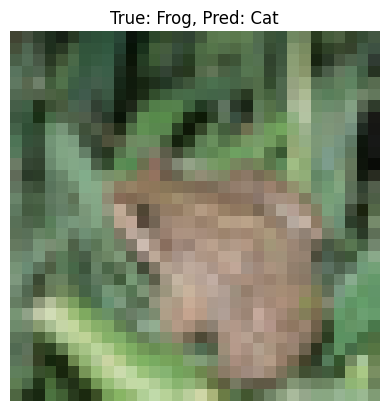

In [ ]:
predictions = model.predict(X_test[:5])
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"True: {classes[int(y_test[i])]}, Pred: {classes[np.argmax(predictions[i])]}")
    plt.axis("off")
    plt.show()